In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath('/Users/qdeng/Personal/cvxbook_additional_exercises/python'))

## A4.2

In [29]:
x = cp.Variable((2,1))

constraints = []
constraints += [2*x[0]+x[1]>=1]
constraints += [1*x[0]+3*x[1]>=1]
constraints += [x[0]>=0]
constraints += [x[1]>=0]

In [30]:
obj = cp.Minimize(x[0]+ x[1])

problem = cp.Problem(obj, constraints)

problem.solve(), x.value

(0.6000000001640435,
 array([[0.4],
        [0.2]]))

In [31]:
obj = cp.Minimize(-x[0] - x[1])

problem = cp.Problem(obj, constraints)

problem.solve(), x.value

(-inf, None)

In [32]:
obj = cp.Minimize(x[0])

problem = cp.Problem(obj, constraints)

problem.solve(), x.value

(-1.95729336465049e-11,
 array([[-1.95729336e-11],
        [ 1.69159744e+00]]))

In [33]:
obj = cp.Minimize(cp.max(x))

problem = cp.Problem(obj, constraints)

problem.solve(), x.value

(0.3333333337083394,
 array([[0.33333333],
        [0.33333333]]))

In [34]:
obj = cp.Minimize(x[0]**2+9*x[1]**2)

problem = cp.Problem(obj, constraints)

problem.solve(), x.value

(0.5,
 array([[0.5       ],
        [0.16666667]]))

## A4.26

In [2]:
n = 2**4

In [3]:
def unit(n, i):
    vec = np.zeros((n, 1))
    vec[i,0] = 1
    return vec
unit(n, 1)

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [4]:
sum([unit(n, 1), unit(n, 5)])

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [74]:
A = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 1],
        [0, 1, 0, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 1]
    ]
)
# A
A = np.array(
    [
        [0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [0, 1, 0, 1],
        [1, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1]
    ]
)
len(A), len(np.unique(A, axis=0))

(16, 16)

In [75]:
np.where((A[:,0]==1)&(A[:,3]==0))

(array([1, 3, 5, 7]),)

In [76]:
sum([unit(n,i) for i in np.where(A[:,3]==1)[0]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [77]:
p = cp.Variable(n)

obj = cp.Maximize( (np.sum([unit(n,i) for i in np.where(A[:,3]==1)[0]], axis=0)).T@p )
# obj = cp.Maximize( cp.sum(p[[ 1,  5,  6,  7, 11, 12, 13, 15]]) )

constraints = []
# constraints += [ p[i]>=0 for i in range(n)]
constraints += [ p>=0 ]
# constraints += [ np.ones((n,1)).T@p==1 ]
constraints += [ cp.sum(p)==1 ]
constraints += [ (np.sum([unit(n,i) for i in np.where(A[:,0]==1)[0]], axis=0)).T@p==0.9 ]
# constraints += [ cp.sum(p[[ 4,  7,  9, 10, 12, 13, 14, 15]])==0.9 ]
constraints += [ (np.sum([unit(n,i) for i in np.where(A[:,1]==1)[0]], axis=0)).T@p==0.9 ]
# constraints += [ cp.sum(p[[ 3,  6,  8, 10, 11, 13, 14, 15]])==0.9 ]
constraints += [ (np.sum([unit(n,i) for i in np.where(A[:,2]==1)[0]], axis=0)).T@p==0.1 ]
# constraints += [ cp.sum(p[[ 2,  5,  8,  9, 11, 12, 14, 15]])==0.1 ]
constraints += [ (np.sum([unit(n,i) for i in np.where((A[:,0]==1)&(A[:,3]==0)&(A[:,2]==1))[0]], axis=0)).T@p==0.7*(np.sum([unit(n,i) for i in np.where(A[:,2]==1)[0]], axis=0)).T@p ]
# constraints += [ cp.sum(p[[ 4,  9, 10, 14]])==0.7*cp.sum(p[[ 2,  5,  8,  9, 11, 12, 14, 15]]) ]
constraints += [ (np.sum([unit(n,i) for i in np.where((A[:,3]==1)&(A[:,1]==1)&(A[:,2]==0))[0]], axis=0)).T@p==\
                0.6*(np.sum([unit(n,i) for i in np.where((A[:,1]==1)&(A[:,2]==0))[0]], axis=0)).T@p]
# constraints += [ p[6]+p[13]==\
#                 0.6*(p[3]+p[6]+p[10]+p[13])]
               
problem = cp.Problem(obj, constraints)

problem.solve('OSQP')

0.6100016109163123

In [78]:
p = cp.Variable(n)

obj = cp.Minimize( (np.sum([unit(n,i) for i in np.where(A[:,3]==1)[0]], axis=0)).T@p )
# obj = cp.Maximize( cp.sum(p[[ 1,  5,  6,  7, 11, 12, 13, 15]]) )

constraints = []
# constraints += [ p[i]>=0 for i in range(n)]
constraints += [ p>=0 ]
# constraints += [ np.ones((n,1)).T@p==1 ]
constraints += [ cp.sum(p)==1 ]
constraints += [ (np.sum([unit(n,i) for i in np.where(A[:,0]==1)[0]], axis=0)).T@p==0.9 ]
# constraints += [ cp.sum(p[[ 4,  7,  9, 10, 12, 13, 14, 15]])==0.9 ]
constraints += [ (np.sum([unit(n,i) for i in np.where(A[:,1]==1)[0]], axis=0)).T@p==0.9 ]
# constraints += [ cp.sum(p[[ 3,  6,  8, 10, 11, 13, 14, 15]])==0.9 ]
constraints += [ (np.sum([unit(n,i) for i in np.where(A[:,2]==1)[0]], axis=0)).T@p==0.1 ]
# constraints += [ cp.sum(p[[ 2,  5,  8,  9, 11, 12, 14, 15]])==0.1 ]
constraints += [ (np.sum([unit(n,i) for i in np.where((A[:,0]==1)&(A[:,3]==0)&(A[:,2]==1))[0]], axis=0)).T@p==0.7*(np.sum([unit(n,i) for i in np.where(A[:,2]==1)[0]], axis=0)).T@p ]
# constraints += [ cp.sum(p[[ 4,  9, 10, 14]])==0.7*cp.sum(p[[ 2,  5,  8,  9, 11, 12, 14, 15]]) ]
constraints += [ (np.sum([unit(n,i) for i in np.where((A[:,3]==1)&(A[:,1]==1)&(A[:,2]==0))[0]], axis=0)).T@p==\
                0.6*(np.sum([unit(n,i) for i in np.where((A[:,1]==1)&(A[:,2]==0))[0]], axis=0)).T@p]
# constraints += [ p[6]+p[13]==\
#                 0.6*(p[3]+p[6]+p[10]+p[13])]
               
problem = cp.Problem(obj, constraints)

problem.solve('OSQP')

0.4799737263312034

In [70]:
np.where(A[:,3]==1)[0]

array([ 1,  5,  6,  7, 11, 12, 13, 15])

In [55]:
np.where(A[:,0]==1)[0]

array([ 1,  3,  5,  7,  9, 11, 13, 15])

In [56]:
np.where(A[:,1]==1)[0]

array([ 2,  3,  6,  7, 10, 11, 14, 15])

In [57]:
np.where(A[:,2]==1)[0]

array([ 4,  5,  6,  7, 12, 13, 14, 15])

In [59]:
np.where((A[:,0]==1)&(A[:,3]==0))[0]

array([1, 3, 5, 7])

In [61]:
(A[:,0]==1)&(A[:,3]==0)

array([False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False])

In [25]:
np.where((A[:,3]==1)&(A[:,1]==1)&(A[:,2]==0))[0],np.where((A[:,1]==1)&(A[:,2]==0))[0]

(array([ 6, 13]), array([ 3,  6, 10, 13]))

In [9]:
obj.expr.is_convex()

True

In [10]:
for each in constraints:
    print(each.expr.is_convex())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [11]:
np.ones((n,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## A7.45

I made a typo with the `constraints`. I typed it as `contraints` which was why it wasn't solving

In [4]:
from minimax_detector_data import *

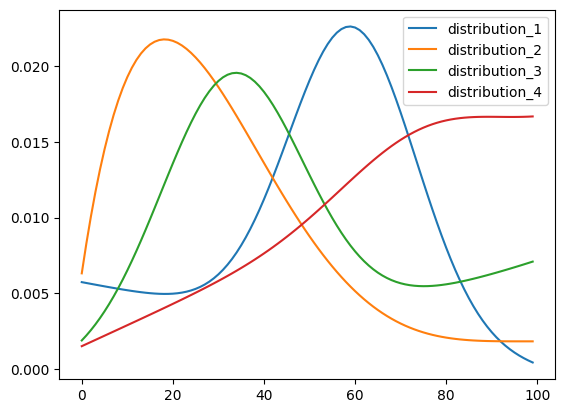

In [5]:
plot_pmfs()

In [6]:
pmf1.shape

(100,)

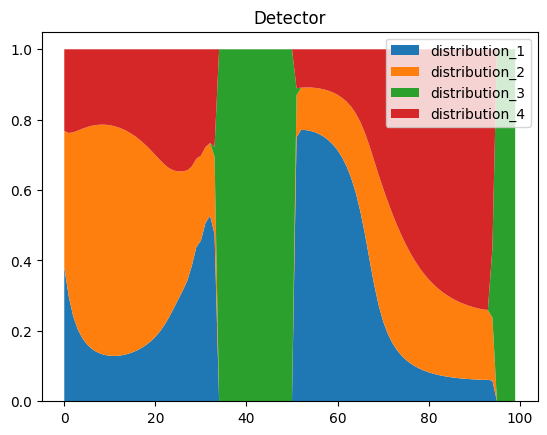

0.2250602841021515

In [14]:
# Minimax Detector
m = 4
n = pmf1.shape[0]

T_mat = cp.Variable((m,n))

constraints = []
constraints += [ np.ones((m,1)).T@T_mat[:,j]==1 for j in range(n) ]
constraints += [ T_mat[i,j]>=0 for i in range(m) for j in range(n) ]

obj = cp.Minimize(cp.max(cp.vstack([(T_mat@P)[i,j] for i in range(m) for j in range(m) if i!=j])))

problem = cp.Problem(obj, constraints)

results = problem.solve() 

plot_stackplot(T_mat.value)
results

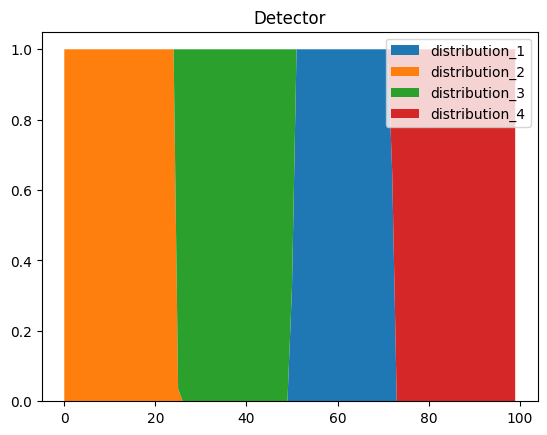

0.4498518018116567

In [15]:
# Maxmin Detector
m = 4
n = pmf1.shape[0]

T_mat = cp.Variable((m,n))

constraints = []
constraints += [ np.ones((m,1)).T@T_mat[:,j]==1 for j in range(n) ]
constraints += [ T_mat[i,j]>=0 for i in range(m) for j in range(n) ]

obj = cp.Maximize(cp.min(cp.vstack([(T_mat@P)[i,i] for i in range(m)])))

problem = cp.Problem(obj, constraints)

results = problem.solve() 
plot_stackplot(T_mat.value)
results

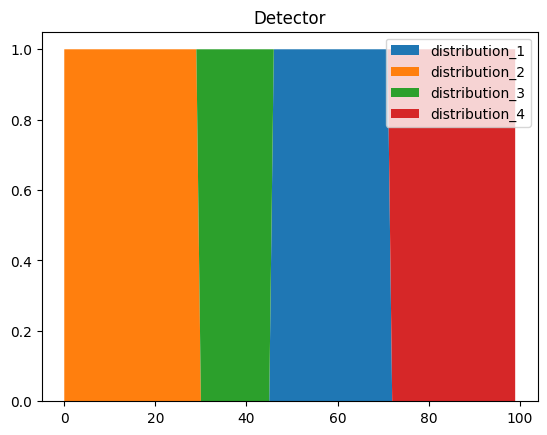

0.18126107954223844

In [16]:
# Minimum Average Error Detector
m = 4
n = pmf1.shape[0]

T_mat = cp.Variable((m,n))

constraints = []
constraints += [ np.ones((m,1)).T@T_mat[:,j]==1 for j in range(n) ]
constraints += [ T_mat[i,j]>=0 for i in range(m) for j in range(n) ]

obj = cp.Minimize(cp.sum([(T_mat@P)[i,j] for i in range(m) for j in range(m) if i!=j])/(m**2-m))

problem = cp.Problem(obj, constraints)

results = problem.solve() 
plot_stackplot(T_mat.value)
results
# T_mat.value

## A20.9

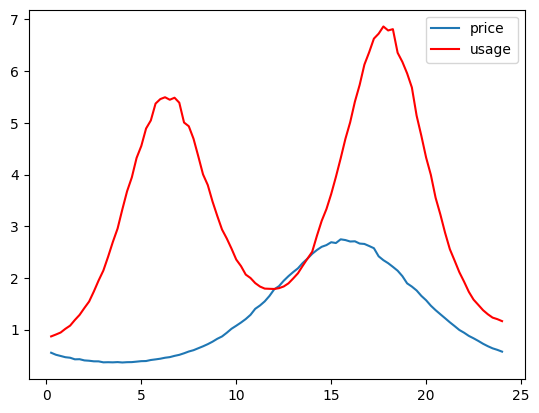

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

T = 96
t = np.linspace(1, T, num=T).reshape(T,1)
p = np.exp(-np.cos((t-15)*2*np.pi/T)+0.01*np.random.randn(T,1))
u = 2*np.exp(-0.6*np.cos((t+40)*np.pi/T) - 0.7*np.cos(t*4*np.pi/T)+0.01*np.random.randn(T,1))


plt.figure(1)
plt.plot(t/4, p, label='price'); 
plt.plot(t/4, u, 'r',label='usage'); 
plt.legend()
plt.show()



In [23]:
import cvxpy as cp

In [24]:
Q = 35
C = 3
D = 3

c = cp.Variable((T,1))
q = cp.Variable((T,1))
obj = cp.Minimize(p.T@(u+c))

constraints = []
constraints += [q[t]<=Q for t in range(T)]
constraints += [c[t]<=C for t in range(T)]
constraints += [c[t]>=-D for t in range(T)]
constraints += [q[t]+c[t]>=0 for t in range(T)]
constraints += [q[t+1]==q[t]+c[t] for t in range(T-1)]
constraints += [q[0]==q[T-1]+c[T-1] for t in range(T-1)]

problem = cp.Problem(obj, constraints)

results = problem.solve() 
results

379.4066553449347

Text(0.5, 0.98, 'Optimal Cost: 379.406655')

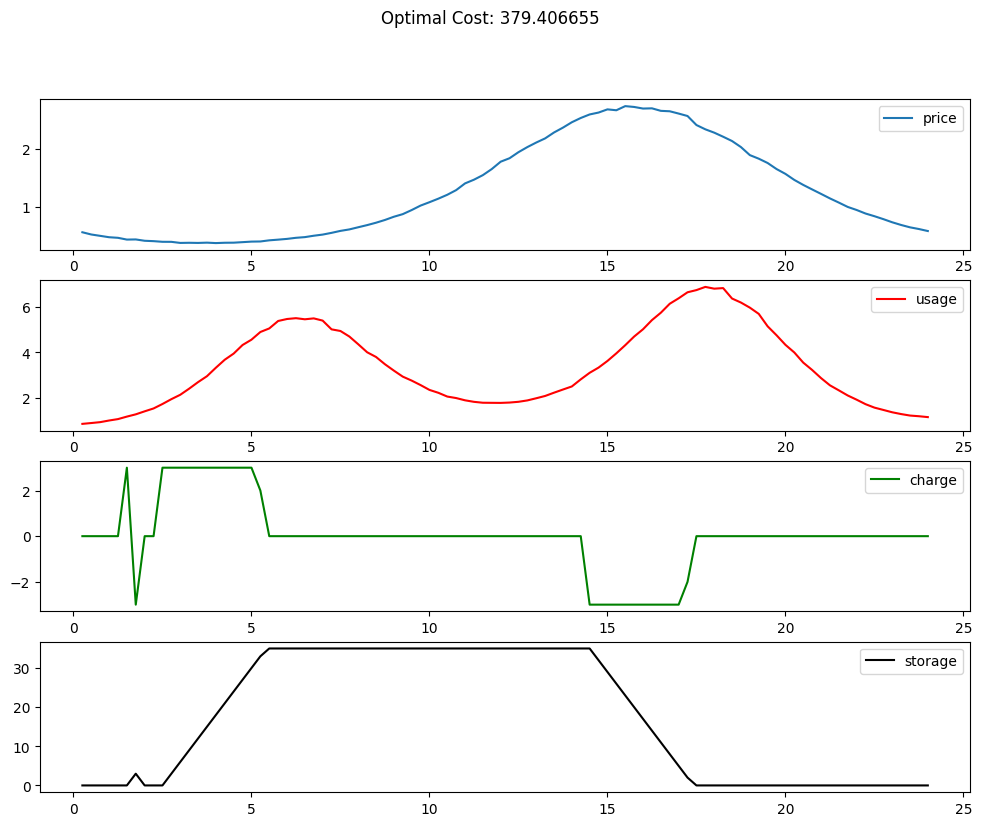

In [25]:
fig, ax = plt.subplots(4,1, figsize=(12,9))
ax[0].plot(t/4, p, label='price'); 
ax[1].plot(t/4, u, 'r',label='usage'); 
ax[2].plot(t/4, c.value, 'g',label='charge')
ax[3].plot(t/4, q.value, 'k',label='storage')
[ax_i.legend() for ax_i in ax.flatten()]
fig.suptitle(f'Optimal Cost: {results:1f}')
# plt.show()

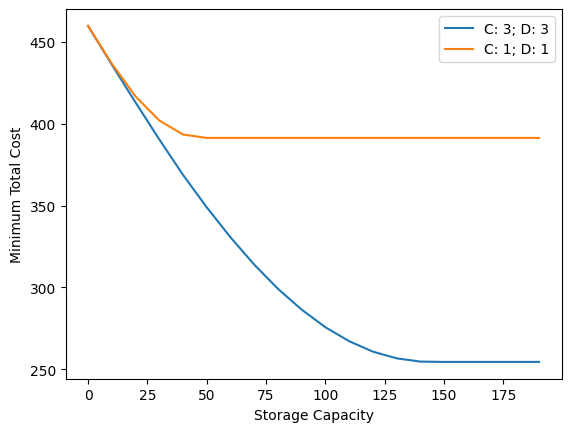

In [26]:
fig, ax = plt.subplots(1,1,)
for C, D in [[3]*2, [1]*2]:
    list_Q = np.arange(0, 200, 10)
    list_res = []
    
    for Q in list_Q:
        
        c = cp.Variable((T,1))
        q = cp.Variable((T,1))
        obj = cp.Minimize(p.T@(u+c))
        
        constraints = []
        constraints += [q[t]<=Q for t in range(T)]
        constraints += [c[t]<=C for t in range(T)]
        constraints += [c[t]>=-D for t in range(T)]
        constraints += [q[t]+c[t]>=0 for t in range(T)]
        constraints += [q[t+1]==q[t]+c[t] for t in range(T-1)]
        constraints += [q[0]==q[T-1]+c[T-1] for t in range(T-1)]
        
        problem = cp.Problem(obj, constraints)
        
        results = problem.solve() 
    
        list_res.append(results)


    ax.plot(list_Q, list_res, label=f'C: {C}; D: {D}')
    ax.set_ylabel('Minimum Total Cost')
    ax.set_xlabel('Storage Capacity')
    ax.grid()
    ax.legend()